In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

import numpy as np
from kmodes.kmodes import KModes

In [15]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)

In [16]:
cluster_2016.head()

,Unnamed: 0,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [17]:
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])

In [18]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Fritzlarerstraße / Kirchplatz,214447.0,Frankfurt am Main,Android,13.083333,6
1999996,143763,Axel-Springer-Platz/Wexstraße,163327.0,Axel-Springer-Platz/Wexstraße,163327.0,Hamburg,others,1.733333,6
1999997,106407,Darmstadt Hbf,42198.0,h_da / Campus - Mensa,41940.0,Berlin,others,246.366667,6
1999998,113595,Darmstadt Hbf,128496.0,h_da / Campus - Mensa,243552.0,Darmstadt,Android,11.016667,6
1999999,143840,Dehnhaide/Barmbeker Markt,17335.0,Weidestraße /Johannes-Prassek-Park,54063.0,Berlin,iPhone,22.816667,6


In [19]:
cluster_2016['VEHICLE_HAL_ID'].unique()

array([108647, 108371, 119829, ..., 110310, 107219, 108927])

In [20]:
len(cluster_2016['VEHICLE_HAL_ID'].unique())

10001

In [21]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [22]:
cluster_2016['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [23]:
#! pip install kmodes
# ! pip install --upgrade pip

# Implementation

In [24]:
# converting all categorcal variable to dummy encoding

cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])

In [25]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,226257.0,214447.0,12,0,13.083333,6
1999996,143763,163327.0,163327.0,18,5,1.733333,6
1999997,106407,42198.0,41940.0,3,5,246.366667,6
1999998,113595,128496.0,243552.0,8,0,11.016667,6
1999999,143840,17335.0,54063.0,3,4,22.816667,6


In [26]:
# To convert the value into numpy array

cluster_2016 = cluster_2016.iloc[:, 0:].values

In [27]:
# printing the first array of features

cluster_2016[0]

array([1.08647e+05, 2.13687e+05, 2.13855e+05, 1.80000e+01, 0.00000e+00,
       2.88000e+01, 1.00000e+00])

In [53]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmode = KModes(n_clusters=11, init='Cao', verbose=2)

clusters = kmode.fit_predict(cluster_2016)
# cluster_2016['clusters'] = clusters


# Print cluster centroids of the trained model.
print(kmode.cluster_centroids_)

# Print training statistics
print(kmode.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3799, cost: 9452951.0
Run 1, iteration: 2/100, moves: 0, cost: 9452951.0
[[1.19999000e+05 1.98077000e+05 1.98077000e+05 1.80000000e+01
  4.00000000e+00 7.65000000e+00 5.00000000e+00]
 [1.20384000e+05 1.31648000e+05 1.31648000e+05 1.80000000e+01
  0.00000000e+00 4.71666667e+00 4.00000000e+00]
 [1.08062000e+05 1.40796000e+05 1.40796000e+05 1.80000000e+01
  4.00000000e+00 5.50000000e-01 4.00000000e+00]
 [1.20463000e+05 1.31879000e+05 1.31879000e+05 1.80000000e+01
  0.00000000e+00 6.10000000e+00 5.00000000e+00]
 [1.15690000e+05 1.38385000e+05 1.40799000e+05 1.80000000e+01
  5.00000000e+00 6.65000000e+00 3.00000000e+00]
 [1.19978000e+05 1.31648000e+05 1.31543000e+05 1.80000000e+01
  5.00000000e+00 8.31666667e+00 5.00000000e+00]
 [1.43690000e+05 1.31648000e+05 1.31879000e+05 1.80000000e+01
  4.00000000e+00 1.07166667e+01 3.00000000e+00]
 [1.43687000e+05 1.98077000e+05 1.31879000e+0

In [54]:
# save the model to disk
import pickle

In [55]:
# creating a file that can save the model
filename = 'kmode.sav'

In [56]:
# save the model in the file
pickle.dump(kmode, open(filename, 'wb'))

In [57]:
# load the model from disk for faster implementation
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.cost_)

9452951.0


In [58]:
# for predict a new data points with index of categorical value

loaded_model.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]))

array([0], dtype=uint8)

In [59]:
print(kmode.cost_)

9452951.0


In [60]:
print(kmode.cluster_centroids_)

# Print training statistics
print(kmode.cost_)
print(kmode.n_iter_)

[[1.19999000e+05 1.98077000e+05 1.98077000e+05 1.80000000e+01
  4.00000000e+00 7.65000000e+00 5.00000000e+00]
 [1.20384000e+05 1.31648000e+05 1.31648000e+05 1.80000000e+01
  0.00000000e+00 4.71666667e+00 4.00000000e+00]
 [1.08062000e+05 1.40796000e+05 1.40796000e+05 1.80000000e+01
  4.00000000e+00 5.50000000e-01 4.00000000e+00]
 [1.20463000e+05 1.31879000e+05 1.31879000e+05 1.80000000e+01
  0.00000000e+00 6.10000000e+00 5.00000000e+00]
 [1.15690000e+05 1.38385000e+05 1.40799000e+05 1.80000000e+01
  5.00000000e+00 6.65000000e+00 3.00000000e+00]
 [1.19978000e+05 1.31648000e+05 1.31543000e+05 1.80000000e+01
  5.00000000e+00 8.31666667e+00 5.00000000e+00]
 [1.43690000e+05 1.31648000e+05 1.31879000e+05 1.80000000e+01
  4.00000000e+00 1.07166667e+01 3.00000000e+00]
 [1.43687000e+05 1.98077000e+05 1.31879000e+05 1.80000000e+01
  5.00000000e+00 9.60000000e+00 4.00000000e+00]
 [1.18963000e+05 1.31879000e+05 1.31648000e+05 1.80000000e+01
  4.00000000e+00 1.30000000e+01 2.00000000e+00]
 [1.107200

In [61]:
# To predict on new data points

kmode.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,
       4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]))

array([0], dtype=uint8)

In [62]:
# Predicted cluster level on existing dataset
final = kmode.labels_
np.unique(final)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [63]:
# total data
kmode.labels_.shape

(2000000,)

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_2016)

In [65]:
%matplotlib inline

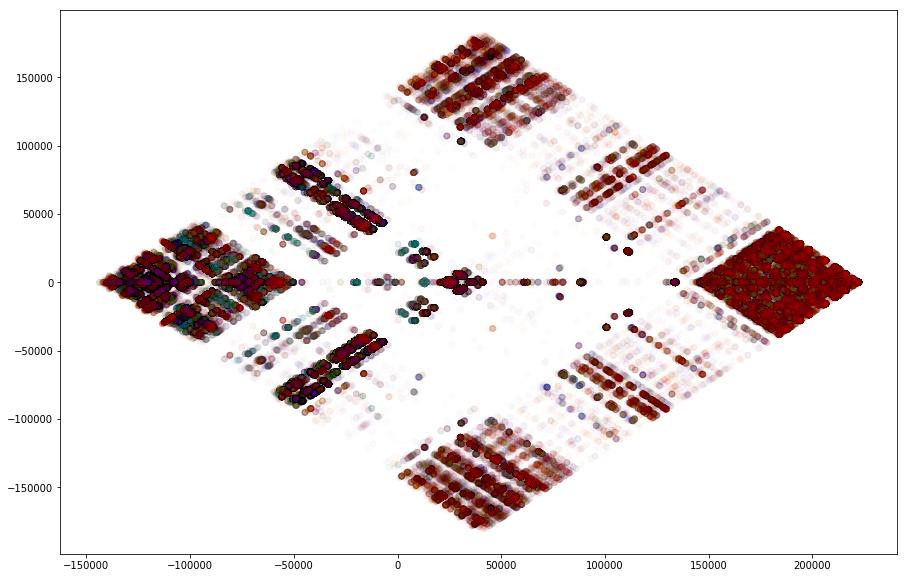

In [66]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown','pink','coral','orange','violet']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in kmode.labels_] ,label = kmode.labels_, alpha=0.01)
plt.show()

In [67]:
plt.savefig('kmode2.png')

<Figure size 432x288 with 0 Axes>

In [68]:
labels = [colors[l_] for l_ in kmode.labels_]

In [69]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    278852
dtype: int64
blue 0    431351
dtype: int64
yellow 0    182793
dtype: int64
green 0    177195
dtype: int64
purple 0    244230
dtype: int64
cyan 0    147240
dtype: int64
brown 0    104969
dtype: int64
pink 0    104837
dtype: int64
coral 0    126551
dtype: int64
orange 0    126613
dtype: int64
violet 0    75369
dtype: int64


* As must of the dataset goes in cluster-1 which is quite big in size
* So again we divide the cluster-1 into 7 small clusters.
* This is called Hierarchical clustering

In [45]:
# As we already used categorical features and they are already encoded. So we use kmeans algorithm for clustering.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)  
pr_out = kmeans.fit(plot_columns)
#plot_columns

In [46]:
pr_out = kmeans.transform(plot_columns)

In [47]:
colors = ['red','green','purple','blue','cyan','black','pink','brown','yellow']

In [48]:
kmeans.labels_

array([0, 2, 2, ..., 1, 3, 1], dtype=int32)

In [49]:
len(plot_columns)

2000000

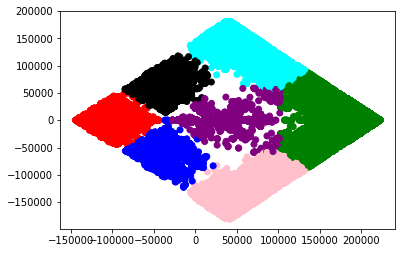

In [50]:
# plotting the sub-clusters 

plt.scatter(plot_columns[:,0],plot_columns[:,1],c=[colors[l] for l in kmeans.labels_])
#plt.show()

In [51]:
plt.savefig('hierarchial_clustering_kmode.png')

<Figure size 432x288 with 0 Axes>

* Here we see that the dataset are easily separable by the cluster labels.

k = 2
10847731.0
k = 3
10659455.0
k = 4
10475247.0
k = 5
10153878.0
k = 6
10002215.0
k = 7
9895386.0
k = 8
9787592.0
k = 9
9659005.0
k = 10
9529505.0
k = 11
9452951.0
k = 12
9448539.0
k = 13
9445037.0
k = 14
9441545.0
k = 15
9437973.0


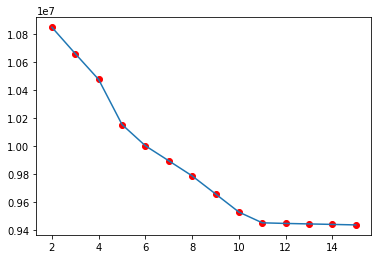

In [52]:
# minimum number of cluster 2 to 15 

k_val = []
cost = []

for i in range(2, 16):
    print("k = " + str(i))

    # init = initialization ,'Cao': Method in Cao et al. [2009]
    
    kmode = KModes(n_clusters=i, init='Cao')

    # categorical = With categorical features index
    clusters = kmode.fit_predict(cluster_2016)

    # Print cluster centroids of the trained model.
    #print(kmode.cluster_centroids_)

    # Print training statistics
    print(kmode.cost_)

    # iteration done
    #print(kproto.n_iter_)
    k_val.append(i)
    cost.append(kmode.cost_)

plt.scatter(k_val,cost,c='red')	    
plt.plot(k_val,cost)
plt.show()